In [ ]:
!pip install prophet


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [12]:
hr_df = pd.read_csv("/content/Milestone3/data/heartrate_seconds_merged.csv")

hr_df['Time'] = pd.to_datetime(hr_df['Time'])

# Use ONLY one user
user_id = hr_df['Id'].iloc[0]
hr_df = hr_df[hr_df['Id'] == user_id]

# Prophet format
hr_df = hr_df.rename(columns={'Time': 'ds', 'Value': 'y'})
hr_df = hr_df[['ds', 'y']].sort_values('ds')

In [13]:
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True
)
model.fit(hr_df)



In [14]:
forecast = model.predict(hr_df[['ds']])

hr_df['yhat'] = forecast['yhat']
hr_df['residual'] = hr_df['y'] - hr_df['yhat']


In [15]:
threshold = 2 * hr_df['residual'].std()

hr_df['anomaly'] = np.where(
    abs(hr_df['residual']) > threshold,
    'Anomaly',
    'Normal'
)


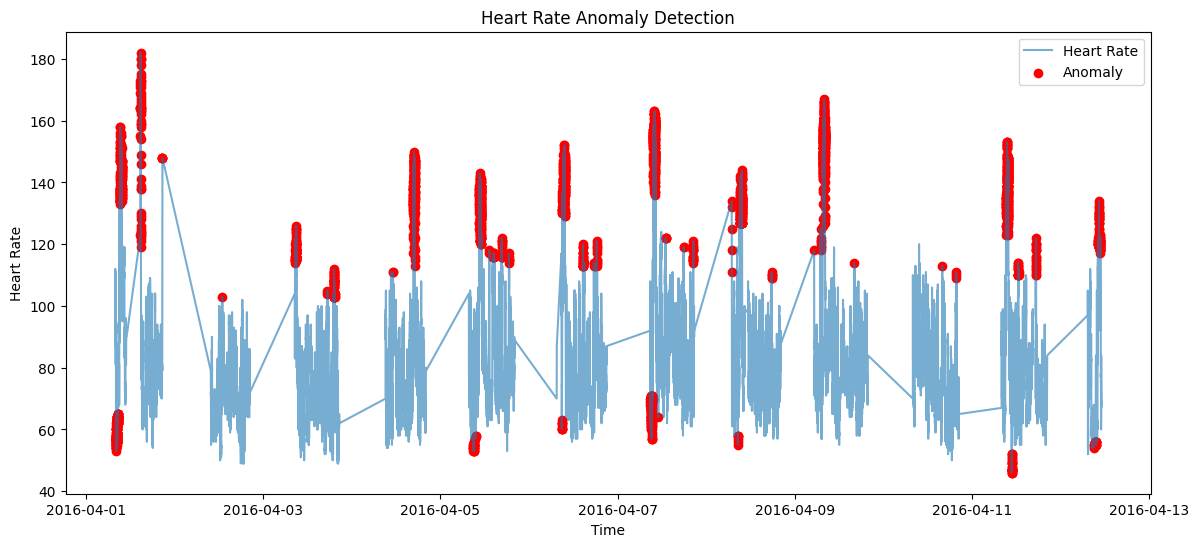

In [16]:
plt.figure(figsize=(14,6))
plt.plot(hr_df['ds'], hr_df['y'], label='Heart Rate', alpha=0.6)

anomalies = hr_df[hr_df['anomaly'] == 'Anomaly']
plt.scatter(anomalies['ds'], anomalies['y'], color='red', label='Anomaly')

plt.title("Heart Rate Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()
plt.show()


In [17]:

sleep_df = pd.read_csv("/content/Milestone3/data/sleepDay_merged.csv")
sleep_df['SleepDay'] = pd.to_datetime(
    sleep_df['SleepDay'],
    format='%m/%d/%Y %I:%M:%S %p'
)

sleep_df = sleep_df.sort_values("SleepDay")


print("Total sleep rows:", len(sleep_df))


Total sleep rows: 413


In [18]:
mean_sleep = sleep_df['TotalMinutesAsleep'].mean()
std_sleep = sleep_df['TotalMinutesAsleep'].std()

sleep_df['anomaly'] = np.where(
    (sleep_df['TotalMinutesAsleep'] < 360) |
    (sleep_df['TotalMinutesAsleep'] > 600),
    'Anomaly',
    'Normal'
)


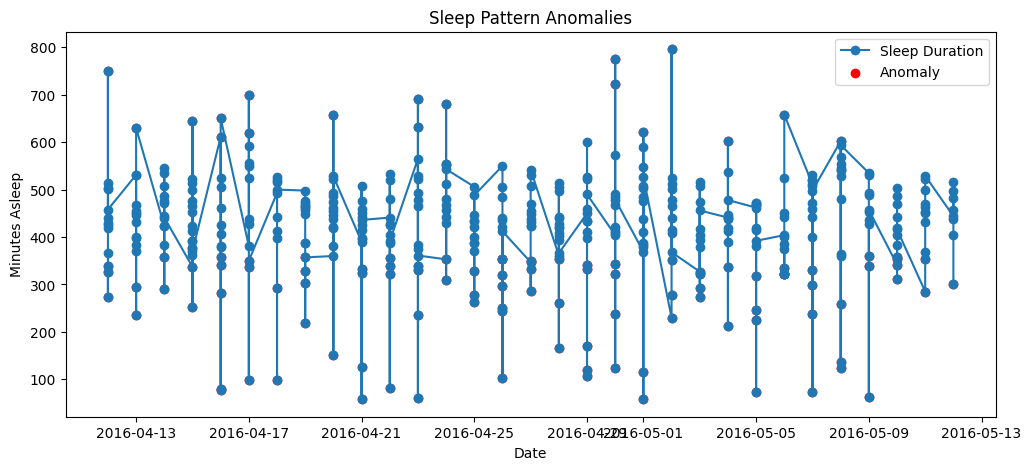

In [19]:
plt.figure(figsize=(12,5))
plt.plot(
    sleep_df['SleepDay'],
    sleep_df['TotalMinutesAsleep'],
    marker='o',
    label='Sleep Duration'
)

sleep_anomalies = sleep_df[sleep_df['anomaly'] == 'Anomaly']
plt.scatter(
    sleep_anomalies['SleepDay'],
    sleep_anomalies['TotalMinutesAsleep'],
    color='red',
    label='Anomaly'
)

plt.title("Sleep Pattern Anomalies")
plt.xlabel("Date")
plt.ylabel("Minutes Asleep")
plt.legend()
plt.show()
